In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
df=pd.read_csv("C://Users//Dell_USA//Downloads//drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
from sklearn.preprocessing import LabelEncoder

df['Drug']=LabelEncoder().fit_transform(df['Drug'])
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df['BP']=LabelEncoder().fit_transform(df['BP'])
df['Cholesterol']=LabelEncoder().fit_transform(df['Cholesterol'])

In [7]:
df['Drug'].value_counts()

Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64

In [8]:
X = df[['Sex', 'Age','BP', 'Cholesterol', 'Na_to_K']] .values

In [9]:
y = df['Drug'].values

In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.040833  , -1.29159102, -1.11016894, -0.97043679,  1.28652212],
       [ 0.96076892,  0.16269866,  0.10979693, -0.97043679, -0.4151454 ],
       [ 0.96076892,  0.16269866,  0.10979693, -0.97043679, -0.82855818],
       [-1.040833  , -0.988614  ,  1.32976279, -0.97043679, -1.14996267],
       [-1.040833  ,  1.0110343 ,  0.10979693, -0.97043679,  0.27179427]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.875, 0.85 , 0.825, 0.75 , 0.725, 0.75 , 0.7  , 0.725, 0.65 ])

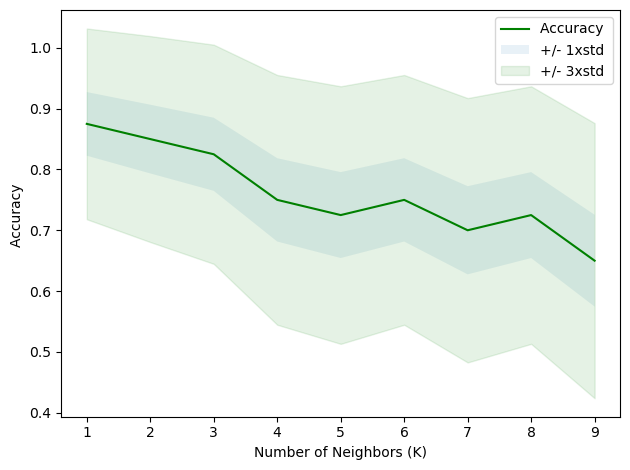

In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()